In [13]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [14]:
data = pd.read_excel('./data/Housing.xlsx')

In [15]:
data[['House Price', 'House Size (sq.ft.)']].head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


## Simple (univariate) regression

Regression analysis assumes the existence of a linear relationship between the two variables.

In this case the prediction is made with the help of the best fitting line that contains the least amount of estimation errors:

$y = \alpha+ \beta x$, where $\alpha$ is an intercept, $\beta$ is a slope.

It quantifies the relationship between a variable, called <u>dependent variable</u>, and one or more <u>explanatory variables</u> (independent variables).

In the example "House size" is an explanatory var, "House price" - dependent variable.

In [16]:
# independent variable
X = data['House Size (sq.ft.)']
# dependent variable (predictor)
y = data['House Price']

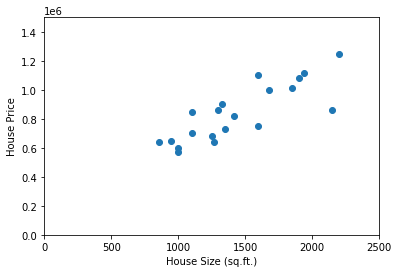

In [17]:
plt.scatter(X,y)
plt.axis([0, 2500, 0, 1500000])
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price')
plt.show()

The regression model can be written as:

$Y = \alpha+ \beta x + {error}$, where error is residuals. The best fitting line minimizes the sum of the squared residuals.


## Explanatory power of the regression model


<u>Coeficient of determination</u> (R-squared) - is a measurement used to explain how much variability of one factor can be caused by its relationship to another related factor:
$$
R^2 = 1 - \frac{SSR}{TSS},\quad R^2\in [0,1]
$$
where:
* <u>Total squred sum</u>:
$TSS = \sum(y_i - \overline{y})^2$, where $\overline{y}$ - mean value of the dependent variable 

* <u>Squared sum of residuals</u>: 
$SSR = \sum(\hat{y} - \overline{y})^2$, where $\hat{y}$ - predicted value (point on the regression line)

<br/>

The higher $R^2$ is, the more predictive power the model has. Model with R^2 > 30% - in most cases can be considered as the one having good explanatory power.

<br/>

$$TSS = SSE + SSR$$

<u>Sum of squares error</u>:
$SSE = \sum e_i^2$, where $e_i$ - the difference between the observed value and the predicted value.

SSE measures the unexplained variability by the regression.



## OLS (Ordinary least squares) estimates 

OLS technique allows to find $\alpha$ and $\beta$ coefficients for regression line with the least ${error}$ 

In [18]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
# Hence, you need to use 'add_constant' so that it also fits an intercept.
#
X1 = sm.add_constant(X)
# X1.head()

In [19]:
# regression
#
reg = sm.OLS(y, X1).fit()

In [20]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           8.13e-06
Time:                        10:14:13   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Dep. Variable` - name of the dependent variable

`Model`, `Method` - type of regression

`R-squared` - R-squared value 

`(coef, const)` - is an intercept $\alpha$

`(coef, dependent_var_name)` - is a slope $\beta$



In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [31]:
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStandard error: {}" \
      .format(slope, intercept, r_value, p_value, std_err))

Slope: 401.91628631922595
Intercept: 260806.2360560964
R-value: 0.8235775534696924
P-value: 8.129642377231308e-06
Standard error: 65.24299510636492


## Multivariate regressions

(𝑌𝑖=β0+β1 𝑋1+β2 𝑋2+β3 𝑋3+ε𝑖)

By considering more variables in the regression equation, we’ll
improve its explanatory power and provide a better idea of the full
picture of circumstances that determine the development of the
variable we are trying to predict